 #  Oписание проекта
 
 Цель проекта:
 сделать предварительный анализ тарифов «Мегалайна» на выборке клиентов из 500 пользователей с учетом их данных за 2018 год (кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил) и определить, какой тариф лучше.
 
 Описание тарифов
 
    Тариф «Смарт»
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    - Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

      Тариф «Ультра»
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    - Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей
 

In [1]:
import pandas as pd

In [2]:
users = pd.read_csv('/datasets/users.csv')

Описание данных

  Таблица users (информация о пользователях):
user_id — уникальный идентификатор пользователя

first_name — имя пользователя

last_name — фамилия пользователя

age — возраст пользователя (годы)

reg_date — дата подключения тарифа (день, месяц, год)

churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)

city — город проживания пользователя

tariff — название тарифного плана

In [3]:
users.head(30) # смотрим на данные в таблице

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Видим в таблице пропущенные значения в дате окончания регистрации, некорректный формат для даты, но эти столцы нам не понадобятся для анализа, можно не менять в данный момент. Лишние столбцы удалим, оставим только user_id, city, tariff.

In [5]:
calls = pd.read_csv('/datasets/calls.csv')

      Таблица calls (информация о звонках):
     
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок
    

In [6]:
calls.head(30) # смотрим на данные в таблице

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Неверный формат для даты, заменим. Обработаем ячейки с нулевой продолжительностью разговора. Округлим продолжительность звонков в большую сторону при минимальном превышении.

In [8]:
internet = pd.read_csv('/datasets/internet.csv')

    Таблица internet (информация об интернет-сессиях):
id — уникальный номер сессии

mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)

session_date — дата интернет-сессии

user_id — идентификатор пользователя

In [9]:
internet.head(30) # смотрим на данные в таблице

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


Неверный формат для даты, заменим. Округлим объем траффика в большую сторону при минимальном превышении.

In [11]:
messages = pd.read_csv('/datasets/messages.csv')

    Таблица messages (информация о сообщениях):
id — уникальный номер сообщения

message_date — дата сообщения

user_id — идентификатор пользователя, отправившего сообщение

In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [13]:
messages.head(30) # смотрим на данные в таблице

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


Неверный формат для даты, заменим.

In [14]:
tariffs = pd.read_csv('/datasets/tariffs.csv')

    Таблица tariffs (информация о тарифах):
tariff_name — название тарифа

rub_monthly_fee — ежемесячная абонентская плата в рублях

minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

messages_included — количество сообщений в месяц, включённых в абонентскую плату

mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

rub_per_message — стоимость отправки сообщения сверх тарифного пакета

rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [15]:
tariffs.head() # смотрим на данные в таблице

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Для удобства заменим названия столбцов.

In [17]:
calls.set_axis(['call_id', 'call_date', 'duration', 'user_id'], axis = 'columns', inplace = True) 
# меняем название id звонка на call_id для удобства в сводных таблицах

In [18]:
calls.head()

,call_id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [19]:
messages.set_axis(['message_id', 'message_date', 'user_id'], axis = 'columns', inplace = True) 
# меняем название столбца на id сообщения

In [20]:
users = users.rename(columns={'tariff': 'tariff_name'}) 
# меняем название столбца тарифы, чтобы соответствовало аналогичному в таблице тарифов

In [21]:
users = users.drop(columns=['age', 'churn_date', 'first_name', 'last_name', 'reg_date'])

In [22]:
users.head()

,user_id,city,tariff_name
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra


Проводим предобработку данных

В таблице calls в столбце с датами имеем тип данных object, меняем на дату

In [23]:
pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

0        2018-07-25
1        2018-08-17
2        2018-06-11
3        2018-09-21
4        2018-12-15
            ...    
202602   2018-12-26
202603   2018-10-18
202604   2018-11-10
202605   2018-10-06
202606   2018-12-14
Name: call_date, Length: 202607, dtype: datetime64[ns]

In [24]:
len(calls.query('duration == 0')) # посчитаем количество звонков с нулевой продолжительностью

39613

39613 звонков с нулевой продолжительностью (около 20%) - много! заменим на средние значения по конкретному пользователю (средние не должны исказить статистику)

In [27]:
calls['mean'] = calls.groupby('user_id')['duration'].transform('mean') # добавили значение со средней продолжительностью звонков для конкретного пользовалеля

In [28]:
calls['duration'] = calls['duration'].where(calls['duration'] != 0, calls['mean'])

In [29]:
calls.head(100) # нули заменены

,call_id,call_date,duration,user_id,mean
0,1000_0,2018-07-25,6.571304,1000,6.571304
1,1000_1,2018-08-17,6.571304,1000,6.571304
2,1000_2,2018-06-11,2.850000,1000,6.571304
3,1000_3,2018-09-21,13.800000,1000,6.571304
4,1000_4,2018-12-15,5.180000,1000,6.571304
...,...,...,...,...,...
95,1000_95,2018-10-15,9.880000,1000,6.571304
96,1000_96,2018-07-03,9.220000,1000,6.571304
97,1000_97,2018-10-26,0.330000,1000,6.571304
98,1000_98,2018-11-18,7.680000,1000,6.571304


В таблице  c объемом интернета в столбце с датами имеем тип данных object, меняем на дату

In [30]:
pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

0        2018-11-25
1        2018-09-07
2        2018-06-25
3        2018-08-22
4        2018-09-24
            ...    
149391   2018-10-03
149392   2018-12-14
149393   2018-10-27
149394   2018-11-26
149395   2018-10-26
Name: session_date, Length: 149396, dtype: datetime64[ns]

В таблице с сообщениями в столбце с датами имеем тип данных object, меняем на дату

In [31]:
pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

0        2018-06-27
1        2018-10-08
2        2018-08-04
3        2018-06-16
4        2018-12-05
            ...    
123031   2018-12-12
123032   2018-09-28
123033   2018-09-27
123034   2018-11-15
123035   2018-11-16
Name: message_date, Length: 123036, dtype: datetime64[ns]

Посчитаем для каждого пользователя:
- количество сделанных звонков и количество израсходованных минут разговора по месяцам 

In [32]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month # добавляем колонку с номером месяца

In [33]:
import math

In [34]:
calls['minutes'] = calls['duration'].apply(math.ceil) # добавляем колонку с количеством полных минут

In [35]:
calls.head()

,call_id,call_date,duration,user_id,mean,month,minutes
0,1000_0,2018-07-25,6.571304,1000,6.571304,7,7
1,1000_1,2018-08-17,6.571304,1000,6.571304,8,7
2,1000_2,2018-06-11,2.850000,1000,6.571304,6,3
3,1000_3,2018-09-21,13.800000,1000,6.571304,9,14
4,1000_4,2018-12-15,5.180000,1000,6.571304,12,6


In [36]:
internet['mb_used'] = internet['mb_used'].apply(math.ceil) # округляем значения траффика до полных МБ

In [37]:
#internet.head()

In [38]:
calls_pivot1 = calls.pivot_table(index = ['user_id', 'month'], values = 'call_id', aggfunc = 'count') 
# создаем сводную таблицу, показывающую количество сделанных звонков минут разговора по месяцам 

In [39]:
calls_pivot1.head()

call_id
user_id month         
1000    5           22
        6           43
        7           47
        8           52
        9           58

In [40]:
calls_pivot1 = calls_pivot1.reset_index()

In [41]:
calls_pivot1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 3 columns):
user_id    3174 non-null int64
month      3174 non-null int64
call_id    3174 non-null int64
dtypes: int64(3)
memory usage: 74.5 KB


In [42]:
calls_pivot2 = calls.pivot_table(index = ['user_id', 'month'], values = 'minutes', aggfunc = 'sum') 
# создаем сводную таблицу, показывающую количество израсходованных минут разговора по месяцам 

In [43]:
calls_pivot2 = calls_pivot2.reset_index()

In [44]:
calls_pivot2.head()

,user_id,month,minutes
0,1000,5,194
1,1000,6,277
2,1000,7,382
3,1000,8,478
4,1000,9,550


In [45]:
calls_pivot = pd.merge(calls_pivot1, calls_pivot2, on=['user_id','month'],how='outer') #объединяем сводные таблицы со значениями по звонкам количестовом минут

In [46]:
calls_pivot.head()

,user_id,month,call_id,minutes
0,1000,5,22,194
1,1000,6,43,277
2,1000,7,47,382
3,1000,8,52,478
4,1000,9,58,550


Посчитаем для каждого пользователя:
- количество отправленных сообщений по месяцам

In [47]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month # добавляем колонку с номером месяца

In [48]:
messages_pivot = messages.pivot_table(index = ['user_id', 'month'], values = 'message_id', aggfunc = 'count') 
# создаем сводную таблицу, показывающую количество отправленных сообщений по месяцам 

In [49]:
messages_pivot = messages_pivot.reset_index()

In [50]:
messages_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
user_id       2717 non-null int64
month         2717 non-null int64
message_id    2717 non-null int64
dtypes: int64(3)
memory usage: 63.8 KB


In [51]:
messages_pivot.head()

,user_id,month,message_id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Посчитаем для каждого пользователя:
- объем израсходованного интернет-трафика по месяцам

In [52]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month # добавляем колонку с номером месяца

In [53]:
internet_pivot = internet.pivot_table(index = ['user_id', 'month'], values = 'mb_used', aggfunc = 'sum')

In [54]:
internet_pivot = internet_pivot.reset_index()

In [55]:
internet_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 3 columns):
user_id    3203 non-null int64
month      3203 non-null int64
mb_used    3203 non-null int64
dtypes: int64(3)
memory usage: 75.2 KB


In [56]:
internet_pivot.head()

,user_id,month,mb_used
0,1000,5,2256
1,1000,6,23257
2,1000,7,14016
3,1000,8,14070
4,1000,9,14581


In [57]:
calls_messages = pd.merge(calls_pivot, messages_pivot, on=['user_id','month'],how='outer') 
#объединяем сводные таблицы со значениями по звонкам и сообщениям

In [58]:
calls_messages.head()

,user_id,month,call_id,minutes,message_id
0,1000,5,22.0,194.0,22.0
1,1000,6,43.0,277.0,60.0
2,1000,7,47.0,382.0,75.0
3,1000,8,52.0,478.0,81.0
4,1000,9,58.0,550.0,57.0


In [59]:
calls_messages_internet = pd.merge(calls_messages, internet_pivot, on=['user_id','month'],how='left')
#объединяем сводные таблицы со значениями по звонкам и сообщениям и интернетом

In [60]:
calls_messages_internet.head()

,user_id,month,call_id,minutes,message_id,mb_used
0,1000,5,22.0,194.0,22.0,2256.0
1,1000,6,43.0,277.0,60.0,23257.0
2,1000,7,47.0,382.0,75.0,14016.0
3,1000,8,52.0,478.0,81.0,14070.0
4,1000,9,58.0,550.0,57.0,14581.0


In [61]:
calls_messages_internet_users = pd.merge(calls_messages_internet, users, on=['user_id'],how='left')
#объединяем сводные таблицы со значениями по звонкам и сообщениям и интернетом и пользователями

In [62]:
calls_messages_internet_users.head()

,user_id,month,call_id,minutes,message_id,mb_used,city,tariff_name
0,1000,5,22.0,194.0,22.0,2256.0,Краснодар,ultra
1,1000,6,43.0,277.0,60.0,23257.0,Краснодар,ultra
2,1000,7,47.0,382.0,75.0,14016.0,Краснодар,ultra
3,1000,8,52.0,478.0,81.0,14070.0,Краснодар,ultra
4,1000,9,58.0,550.0,57.0,14581.0,Краснодар,ultra


In [63]:
total = pd.merge(calls_messages_internet_users, tariffs, on=['tariff_name'],how='outer')
#объединяем сводные таблицы со значениями по звонкам и сообщениям и интернетом и пользователями и тарифами

In [64]:
total = total.reset_index(drop=True)

In [65]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3213 entries, 0 to 3212
Data columns (total 15 columns):
user_id                  3213 non-null int64
month                    3213 non-null int64
call_id                  3174 non-null float64
minutes                  3174 non-null float64
message_id               2717 non-null float64
mb_used                  3202 non-null float64
city                     3213 non-null object
tariff_name              3213 non-null object
messages_included        3213 non-null int64
mg_per_month_included    3213 non-null int64
minutes_included         3213 non-null int64
rub_monthly_fee          3213 non-null int64
rub_per_gb               3213 non-null int64
rub_per_message          3213 non-null int64
rub_per_minute           3213 non-null int64
dtypes: float64(4), int64(9), object(2)
memory usage: 376.6+ KB


In [66]:
total.head(40)

,user_id,month,call_id,minutes,message_id,mb_used,city,tariff_name,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,194.0,22.0,2256.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,277.0,60.0,23257.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,382.0,75.0,14016.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,478.0,81.0,14070.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,550.0,57.0,14581.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
5,1000,10,57.0,441.0,73.0,14717.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
6,1000,11,43.0,380.0,58.0,14768.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
7,1000,12,46.0,389.0,70.0,9827.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
8,1003,8,55.0,464.0,37.0,8571.0,Москва,ultra,1000,30720,3000,1950,150,1,1
9,1003,9,134.0,1164.0,91.0,12479.0,Москва,ultra,1000,30720,3000,1950,150,1,1


В колонке с сообщениями есть пропущенные значения - заполним нулями, очевидно, сообщения просто не отправлялись

In [67]:
total = total.fillna(0)

Далее для каждого пользователя требуется посчитать помесячную выручку (вычитаем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножаем на значение из тарифного плана).

In [68]:
def revenue(data):
    if data['minutes'] > data['minutes_included']:
        rev_minute = (data['minutes']- data['minutes_included']) * data['rub_per_minute']
    else:
        rev_minute = 0
    if data['message_id'] > data['messages_included']:
        rev_message = (data['message_id'] - data['messages_included']) * data['rub_per_message']
    else:
        rev_message = 0
    if data['mb_used'] > data['mg_per_month_included']:
        rev_mb = (data['mb_used'] - data['mg_per_month_included'])* data['rub_per_gb'] * 0.001
    else:
        rev_mb = 0
    return (data['rub_monthly_fee'] + rev_minute + rev_message + rev_mb)
    

In [69]:
total['revenue'] = total.apply(revenue, axis=1) # добавляем столбец со значение выручки, подсчитанной при помощи функции выше

In [70]:
total['average_revenue'] = (total.groupby('user_id')['revenue'].transform('sum')) / (total.groupby('user_id')['month'].transform('count'))
# добавляем столбец средней выручки без учета месяца 

In [71]:
total.head() #проверяем выручку последних клиентов

,user_id,month,call_id,minutes,message_id,mb_used,city,tariff_name,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue,average_revenue
0,1000,5,22.0,194.0,22.0,2256.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0,1950.0
1,1000,6,43.0,277.0,60.0,23257.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0,1950.0
2,1000,7,47.0,382.0,75.0,14016.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0,1950.0
3,1000,8,52.0,478.0,81.0,14070.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0,1950.0
4,1000,9,58.0,550.0,57.0,14581.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0,1950.0


Проанализируем данные и попробуем описать поведение клиентов оператора, исходя из выборки.
Для этого посмотрим, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц.
Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы и опишем распределения.

In [72]:
tariff_pivot = total.pivot_table(index = 'tariff_name', values = ['minutes', 'message_id', 'mb_used', 'revenue'], aggfunc = 'mean')

In [74]:
tariff_pivot.head() # таблица со средними значениями объема интернета, количества сообщений, звонков и выручки для тарифов смарт и ультра

,mb_used,message_id,minutes,revenue
tariff_name,,,,
smart,16229.188425,33.384029,500.224316,1391.916734
ultra,19506.165650,49.413618,628.040650,2063.297713


Получили данные по средним значения по тарифам


                     mb_used	    message_id	minutes	    revenue 
    tariff_name				
    smart	        16229.188425	33.384029	500.224316	1391.916734
    ultra	        19506.165650	49.413618	628.040650	2063.297713

In [75]:
total_smart = total[total['tariff_name'] == 'smart'] # сделаем две отдельные таблицы для разных тарифов
total_ultra = total[total['tariff_name'] == 'ultra']

In [76]:
total_smart.head()

,user_id,month,call_id,minutes,message_id,mb_used,city,tariff_name,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue,average_revenue
984,1001,11,59.0,528.0,0.0,18452.0,Москва,smart,50,15360,500,550,200,3,3,1252.4,940.200000
985,1001,12,63.0,526.0,0.0,14053.0,Москва,smart,50,15360,500,550,200,3,3,628.0,940.200000
986,1002,6,15.0,124.0,4.0,10871.0,Стерлитамак,smart,50,15360,500,550,200,3,3,550.0,967.342857
987,1002,7,26.0,249.0,11.0,17601.0,Стерлитамак,smart,50,15360,500,550,200,3,3,998.2,967.342857
988,1002,8,42.0,324.0,13.0,20347.0,Стерлитамак,smart,50,15360,500,550,200,3,3,1547.4,967.342857


In [77]:
total_ultra.head()

,user_id,month,call_id,minutes,message_id,mb_used,city,tariff_name,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue,average_revenue
0,1000,5,22.0,194.0,22.0,2256.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0,1950.0
1,1000,6,43.0,277.0,60.0,23257.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0,1950.0
2,1000,7,47.0,382.0,75.0,14016.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0,1950.0
3,1000,8,52.0,478.0,81.0,14070.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0,1950.0
4,1000,9,58.0,550.0,57.0,14581.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0,1950.0


In [78]:
import numpy as np # импортируем библиотеку для подсчета математических функций и расчитываем показатели

In [79]:
print('Дисперсия по минутам разговора для тарифа смарт', np.var(total_smart['minutes'], ddof=1),'\n' ,'Дисперсия по минутам разговора для тарифа ультра', np.var(total_ultra['minutes'], ddof=1),'\n')
print('Стандартное отклонение по минутам разговора для тарифа смарт', np.std(total_smart['minutes'], ddof=1),'\n', 'Стандартное отклонение по минутам разговора для тарифа ультра', np.std(total_ultra['minutes'], ddof=1))

Дисперсия по минутам разговора для тарифа смарт 50256.28718226286 
 Дисперсия по минутам разговора для тарифа ультра 141187.67281178408 

Стандартное отклонение по минутам разговора для тарифа смарт 224.17914082773817 
 Стандартное отклонение по минутам разговора для тарифа ультра 375.74948145244866


In [80]:
print('Дисперсия по количествам сообщений по тарифу смарт', np.var(total_smart['message_id'], ddof=1), '\n', 'Дисперсия по количествам сообщений по тарифу ультра', np.var(total_ultra['message_id'], ddof=1), '\n')
print('Стандартное отклонение по количествам сообщений по тарифу смарт', np.std(total_smart['message_id'], ddof=1), '\n', 'Стандартное отклонение по количествам сообщений по тарифу ультра', np.std(total_ultra['message_id'], ddof=1))

Дисперсия по количествам сообщений по тарифу смарт 796.8129584480083 
 Дисперсия по количествам сообщений по тарифу ультра 2285.109519349263 

Стандартное отклонение по количествам сообщений по тарифу смарт 28.22787555676141 
 Стандартное отклонение по количествам сообщений по тарифу ультра 47.802819156920684


In [81]:
print('Дисперсия по объему интернета по тарифу смарт', np.var(total_smart['mb_used'], ddof=1), '\n', 'Дисперсия по объему интернета по тарифу ультра', np.var(total_ultra['mb_used'], ddof=1), '\n')
print('Стандартное отклонение по объему интернета по тарифу смарт', np.std(total_smart['mb_used'], ddof=1), '\n', 'Стандартное отклонение по объему интернета по тарифу ультра', np.std(total_ultra['mb_used'], ddof=1), '\n')

Дисперсия по объему интернета по тарифу смарт 34545911.12695753 
 Дисперсия по объему интернета по тарифу ультра 101673407.67039572 

Стандартное отклонение по объему интернета по тарифу смарт 5877.576977544193 
 Стандартное отклонение по объему интернета по тарифу ультра 10083.323245358928 



In [82]:
import matplotlib.pyplot as plt

In [83]:
import seaborn as sns

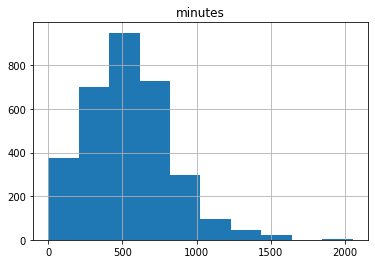

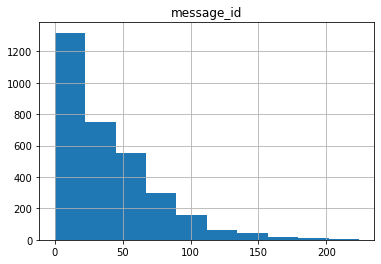

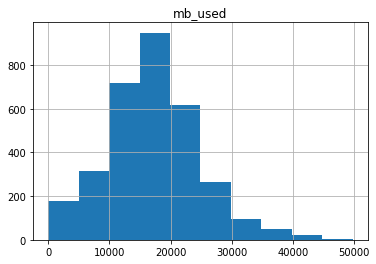

In [84]:
for column in total_smart[['minutes', 'message_id', 'mb_used']]: # смотрим распределения для тарифа смарт
    total[column].hist()
    plt.title(column)
    plt.show()

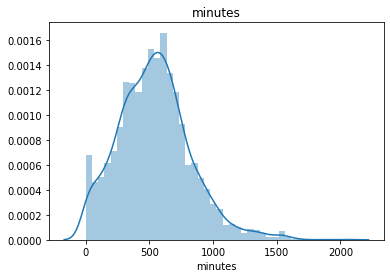

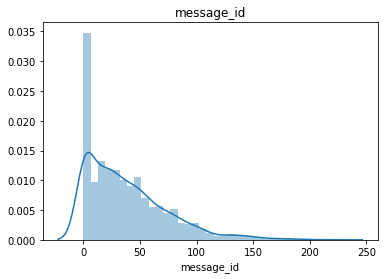

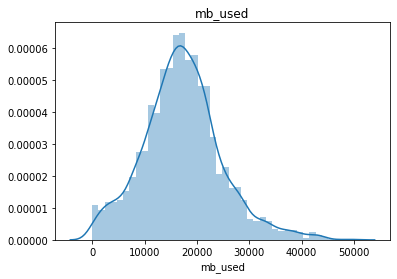

In [85]:
for column in total_smart[['minutes', 'message_id', 'mb_used']]: # смотрим распределения для тарифа смарт
    sns.distplot(total[column])
    plt.title(column)
    plt.show()

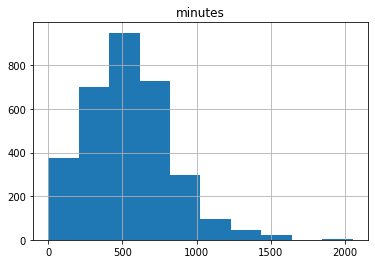

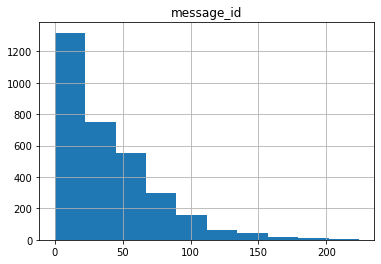

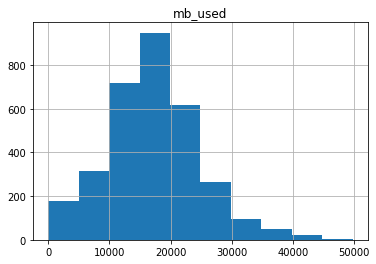

In [86]:
for column in total_ultra[['minutes', 'message_id', 'mb_used']]: # смотрим распределения для тарифа ультра
    total[column].hist()
    plt.title(column)
    plt.show()

Распределения для обоих тарифов выглядят схоже.

По минутам и объему интернет трафика распределения близки к нормальному со скошенностью право (по интернет трафику скошеность более выражено): 
- Максимальное количество минут приходится на диапазон 420-700 минут.
- Максимальное количество интернет трафика приходится на диапазон 15000-20000 МБ.

Распределение по сообщениям несимметрично - максимальное количество сообщений в диапазоне от 0 до 10, далее - снижение.

Проверяем гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
Пороговое значение alpha задаем 0.05 - стандартный вариант для уровня значимости 5%.

    Нулевую гипотезу сформулируем так:
    средняя выручка пользователей тарифов «Ультра» и «Смарт» равны (нулевая гипотеза должна формироваться со знаком равенства).
    Альтернативную гипотезу сформулируем так:
    средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны (будет принята, если удастся опровергнуть альтернативную гипотезу).
    Дисперсии выборок считаем примерно равными

In [87]:
from scipy import stats as st

In [88]:
import numpy as np

alpha = 0.05  #критический уровень статистической значимости

results = st.ttest_ind(
    total_smart['average_revenue'], 
    total_ultra['average_revenue']) # используем среднее значение выручки вне зависимости от месяца

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.2971301155973923e-217
Отвергаем нулевую гипотезу


Вывод: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

In [89]:
total_Moscow = total[total['city'] == 'Москва'] # сделаем две отдельные таблицы для Москвы и всех остальных
total_notMoscow = total[total['city'] != 'Москва']

Проверяем гипотезу о том, что средняя выручка пользователей Москвы и не Москвы различается. Пороговое значение alpha задаем 0.05 - стандартный вариант для уровня значимости 5%.

Нулевую гипотезу сформулируем так:
средняя выручка пользователей Москвы и не Москвы равны (нулевая гипотеза должна формироваться со знаком равенства).
Альтернативную гипотезу сформулируем так:
средняя выручка пользователей Москвы и не Москвы не равны (будет принята, если удастся опровергнуть альтернативную гипотезу).
Дисперсии выборок считаем примерно равными

In [90]:
alpha = 0.05  #критический уровень статистической значимости

results = st.ttest_ind(total_Moscow['average_revenue'], total_notMoscow['average_revenue'])  # используем среднее значение выручки вне зависимости от месяца

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.9513878987671899
Не получилось отвергнуть нулевую гипотезу


Вывод: средняя выручка пользователей Москвы и не Москвы различается.

# Общий вывод 

 На основании статистики пользователей сети тарифов «Ультра» и «Смарт» определили:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя .

На основании плученных данных проанализировали поведение клиентов оператора, исходя из выборки.

Получили данные по средним значения по тарифам

                      mb_used        message_id    minutes        revenue 
    tariff_name                
    smart            16229.188425    33.384029    500.224316    1391.916734
    ultra            19506.165650    49.413618    628.040650    2063.297713

Для данных параметров посчитали статистические величины.

    Дисперсия по минутам разговора для тарифа смарт 50256.28718226286 
    Дисперсия по минутам разговора для тарифа ультра 141187.67281178408 

    Стандартное отклонение по минутам разговора для тарифа смарт 224.17914082773817 
    Стандартное отклонение по минутам разговора для тарифа ультра 375.74948145244866
    
    Дисперсия по количествам сообщений по тарифу смарт 796.8129584480083 
    Дисперсия по количествам сообщений по тарифу ультра 2285.109519349263 

    Стандартное отклонение по количествам сообщений по тарифу смарт 28.22787555676141 
    Стандартное отклонение по количествам сообщений по тарифу ультра 47.802819156920684
    
    Дисперсия по объему интернета по тарифу смарт 34545911.12695753 
    Дисперсия по объему интернета по тарифу ультра 101673407.67039572 

    Стандартное отклонение по объему интернета по тарифу смарт 5877.576977544193 
    Стандартное отклонение по объему интернета по тарифу ультра 10083.323245358928 
    
Построили для этих параметвов и гистограммы, из которых получили определенную картину.

    Распределения для обоих тарифов выглядят сходно.

    По минутам и объему интернет трафика распределения близки к нормальному со скошенностью право (по интернет трафику скошеность более выражено): 
    - Максимальное количество минут приходится на диапазон 420-700 минут.
    - Максимальное количество интернет трафика приходится на диапазон 15000-20000 МБ.

    Распределение по сообщениям несимметрично - максимальное количество сообщений в диапазоне от 0 до 10, далее - снижение.

Проверяем гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Пороговое значение alpha задаем 0.05 - стандартный вариант для уровня значимости 5%.

    Нулевую гипотезу сформулируем так:
    средняя выручка пользователей тарифов «Ультра» и «Смарт» равны (нулевая гипотеза должна формироваться со знаком равенства).
    Альтернативную гипотезу сформулируем так:
    средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны (будет принята, если удастся опровергнуть альтернативную гипотезу).
    Дисперсии выборок считаем примерно равными.
    
    p-значение: 3.2971301155973923e-217
    Отвергаем нулевую гипотезу
    Вывод: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
    
Проверяем гипотезу о том, что средняя выручка пользователей Москвы и не Москвы различается. Пороговое значение alpha задаем 0.05 - стандартный вариант для уровня значимости 5%.

    Нулевую гипотезу сформулируем так:
    средняя выручка пользователей Москвы и не Москвы равны (нулевая гипотеза должна формироваться со знаком равенства).
    Альтернативную гипотезу сформулируем так:
    средняя выручка пользователей Москвы и не Москвы не равны (будет принята, если удастся опровергнуть альтернативную гипотезу).
    Дисперсии выборок считаем примерно равными.
    
    p-значение: 0.9513878987671899
    Не получилось отвергнуть нулевую гипотезу
    Вывод: средняя выручка пользователей Москвы и регионов не различается.
    
В результате проделанной работы мы узнали, что выручка от тарифа "Смарт" приносит меньше дохода, чем выручка от тарифа "Ультра" (подтвердждено несколькими методами, примерно на 30% меньше при подсчете с учетом месяца).
Также средняя выручка пользователей Москвы и пользователей других регионов не различается, поэтому локацию можно во внимание не принимать для канных категорий.

Рекомендации: коммерческий отдел может увеличивать рекламный бюджет тарифа Ультра как более выгодного, размещение рекламы эффективно как в Москве, так и в регионах.
